In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math

from scipy.interpolate import interp1d

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter

C:\Users\maria\AppData\Roaming\Python\Python36\site-packages\mpl_toolkits\axes_grid\__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'xtick.major.pad':20})
plt.rcParams.update({'ytick.major.pad':20})

In [3]:
colours = {32:'C0', 64:'C1', 128:'C2', 256:'C3', 512:'C4', 0:'C6'}

In [4]:
path = 'data1d\\'
path_pics = 'pics\\'
L = 512

# Metropolis algorithm
## Second moments of energy and acceptance ratio: Variance of the acceptance ratio versus heat capacity. 
Simulations were done for one-dimensional Ising model (circles), 3- and 4-state Potts models (triangles and diamonds, respectively), and the XY model (squares).

C:\Users\maria\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


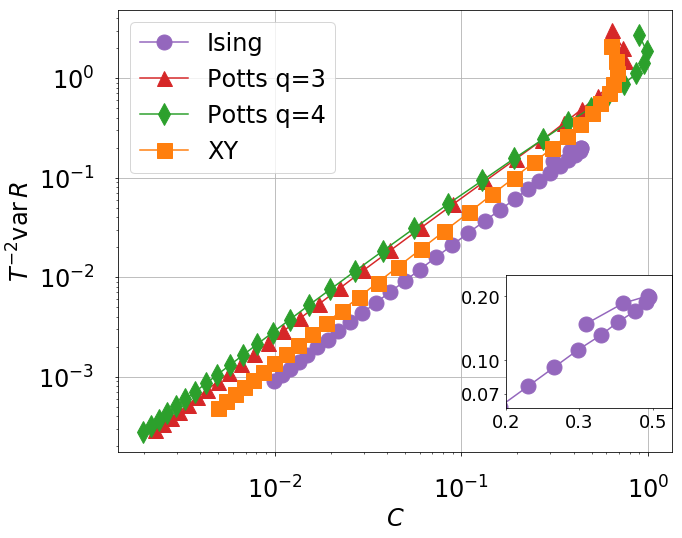

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.7,0.1,0.3,0.3])
ax2.set_axes_locator(ip)   

filename = 'metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
#ax.errorbar(np.log(arr[1:,2]/L**1*arr[1:,0]**0), np.log(arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  fmt='o-', label='Ising', color=colours[64], ms=15)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  'o-', label='Ising', color=colours[512], ms=15)

ax2.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  'o-', label='Ising', color=colours[512], ms=15)
ax2.set_xlim(0.2, 0.5)
ax2.set_ylim(0.06, 0.25)


ax2.xaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_minor_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_ticks([0.2, 0.1, 0.07], minor=True)
ax2.yaxis.set_ticks([], minor=False)

ax2.xaxis.set_ticks([0.2, 0.3, 0.45], minor=True)
ax2.xaxis.set_ticks([], minor=False)


ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

filename = 'metropolis q=3 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2, '^-', label='Potts q=3', color=colours[256], ms=15)    

filename = 'metropolis q=4 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2, 'd-', label='Potts q=4', color=colours[128], ms=15)

filename = 'metropolis XY T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  's-', label='XY', color=colours[64], ms=15)

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$C$')
ax.set_ylabel(r'$T^{-2} \mathrm{var}\,{R} $')

fig.tight_layout()

fig.savefig(path_pics + 'All1M-CR-loglog.png', dpi=300)

# Heat bath algorithm
## Second moments of energy and acceptance ratio: Variance of the acceptance ratio versus heat capacity. 
Simulations were done for one-dimensional Ising model (circles), 3- and 4-state Potts models (triangles and diamonds, respectively), and the XY model (squares).

C:\Users\maria\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


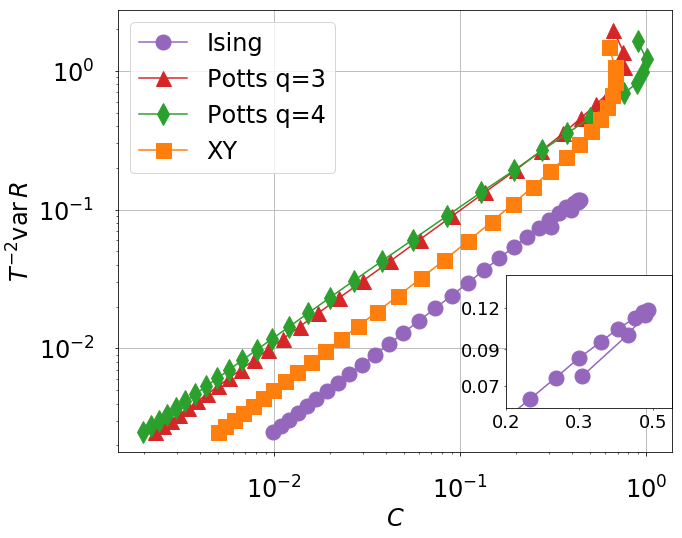

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.7,0.1,0.3,0.3])
ax2.set_axes_locator(ip)   

filename = 'heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  'o-', label='Ising', color=colours[512], ms=15)

ax2.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  'o-', label='Ising', color=colours[512], ms=15)
ax2.set_xlim(0.2, 0.5)
ax2.set_ylim(0.06, 0.15)


ax2.xaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_minor_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_ticks([0.12, 0.09, 0.07], minor=True)
ax2.yaxis.set_ticks([], minor=False)

ax2.xaxis.set_ticks([0.2, 0.3, 0.45], minor=True)
ax2.xaxis.set_ticks([], minor=False)


ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

filename = 'heatbath q=3 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2, '^-', label='Potts q=3', color=colours[256], ms=15)    

filename = 'heatbath q=4 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2, 'd-', label='Potts q=4', color=colours[128], ms=15)

filename = 'heatbath XY T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.loglog(arr[1:,2]/L**1*arr[1:,0]**0, arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2,  's-', label='XY', color=colours[64], ms=15)

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$C$')
ax.set_ylabel(r'$T^{-2} \mathrm{var}\,{R} $')

fig.tight_layout()

fig.savefig(path_pics + 'All1HB-CR-loglog.png', dpi=300)


# Metropolis algorithm
## Average acceptance ratios of the Metropolis updates for one-dimensional models: the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares). 
Symbols are simulation results with erorrbars, lines are to guide an eye. Simulations were done withL = 512 spins with periodic boundary conditions.

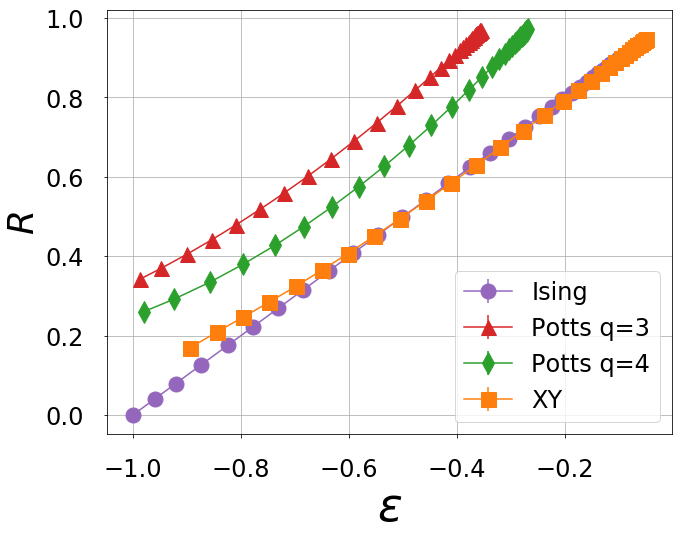

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

filename = 'metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt='o-', label="Ising", color=colours[512], ms=15)

filename = 'metropolis q=3 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='^-', label="Potts q=3", color=colours[256], ms=15)

filename = 'metropolis q=4 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='d-', label="Potts q=4", color=colours[128], ms=15)

filename = 'metropolis XY T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='s-', label="XY", color=colours[64], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = (1 + e)    

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$\varepsilon$', fontsize=46)
ax.set_ylabel(r'$R$', fontsize=36)

fig.tight_layout()

fig.savefig(path_pics + 'ALL1M-ER.png', dpi=300)


# Heat bath algorithm
## Average acceptance ratios of the Metropolis updates for one-dimensional models: the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares). 
Symbols are simulation results with erorrbars, lines are to guide an eye. Simulations were done withL = 512 spins with periodic boundary conditions.

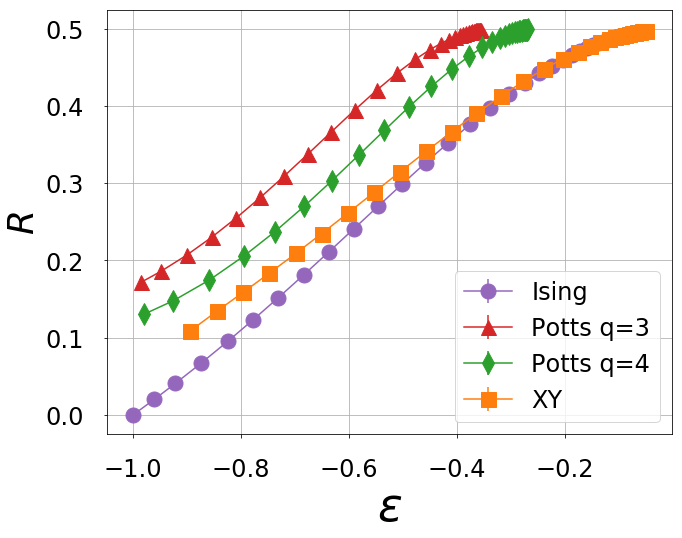

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

filename = 'heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt='o-', label="Ising", color=colours[512], ms=15)

filename = 'heatbath q=3 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='^-', label="Potts q=3", color=colours[256], ms=15)

filename = 'heatbath q=4 T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='d-', label="Potts q=4", color=colours[128], ms=15)

filename = 'heatbath XY T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e5*L), fmt='s-', label="XY", color=colours[64], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = (1 + e)    

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$\varepsilon$', fontsize=46)
ax.set_ylabel(r'$R$', fontsize=36)

fig.tight_layout()

fig.savefig(path_pics + 'ALL1HB-ER.png', dpi=300)


# Average acceptance ratio of the Metropolis updates  for the 1D Ising model (1). 
Simulation were done for L = 512 spins with periodic boundary conditions. Symbols are simulation results, with errorbars shown at all points. Solid line is predicted relation (14).

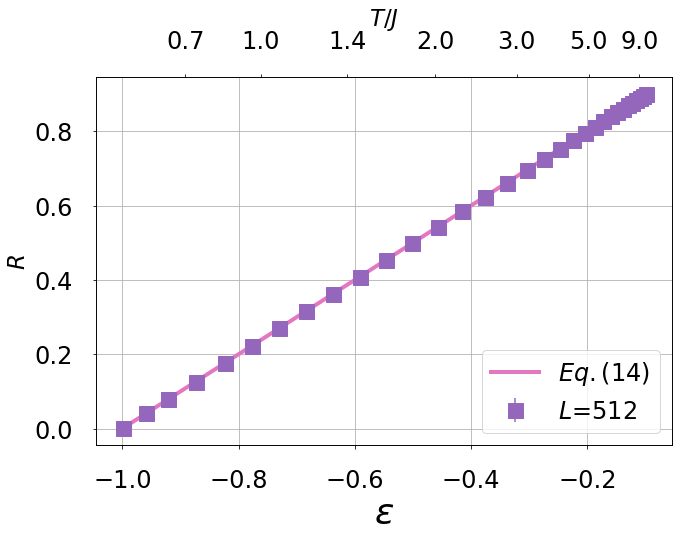

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
fmtd = {128: 'o', 256:'^', 512:'s'}

filename = 'metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt=fmtd[L], label='$L$='+str(L), color=colours[L], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = (1 + e)    
ax.plot(e, r_predicted, label=r'$Eq.(14)$', color=colours[0], linewidth=4)

ax.grid(True)
ax.legend(loc=4) 
ax.set_xlabel(r'$ \varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=23)
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel(r'$T/J$', fontsize=23)

ticks = [ 0.7, 1., 1.4, 2., 3., 5., 9.]
f = interp1d(arr[:,0], arr[:,1], kind='cubic')
ax2.set_xticks(f(ticks))
ax2.set_xticklabels([str(t) for t in ticks])

fig.tight_layout()

fig.savefig(path_pics + 'I1M-ERT_0.7.png', dpi=300)


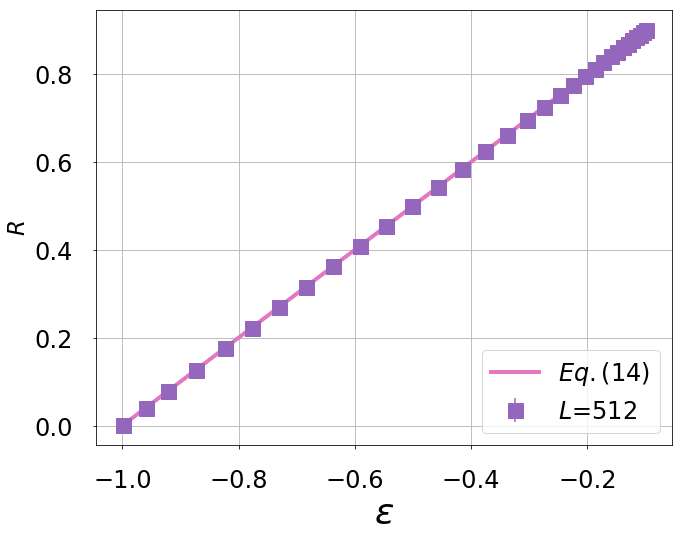

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
fmtd = {128: 'o', 256:'^', 512:'s'}

filename = 'metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt=fmtd[L], label='$L$='+str(L), color=colours[L], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = (1 + e)    
ax.plot(e, r_predicted, label=r'$Eq.(14)$', color=colours[0], linewidth=4)

ax.grid(True)
ax.legend(loc=4) 
ax.set_xlabel(r'$ \varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=23)
ax.grid(True)

fig.tight_layout()

fig.savefig(path_pics + 'I1M-ER.png', dpi=300)


# Average acceptance ratio of the Heat bath updates  for the 1D Ising model (1). 
Simulation were done for L = 512 spins with periodic boundary conditions. Symbols are simulation results, with errorbars shown at all points. Solid line is predicted relation (16).

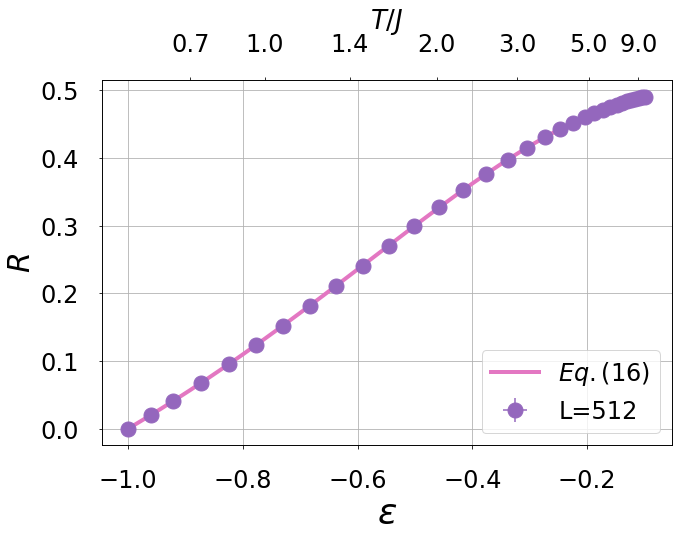

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

filename = 'heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], xerr=arr[:,5], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt='o', label='L='+str(L), color=colours[L], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = 0.5*(1 - e**2) / (1 + e**2)    
ax.plot(e, r_predicted, label=r'$Eq. (16)$', color=colours[0], linewidth=4)   

ax.legend(loc=4)    
ax.set_xlabel(r'$ \varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=30)
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel(r'$T/J$', fontsize=26)
    
ticks = [ 0.7, 1., 1.4, 2., 3., 5., 9.]
f = interp1d(arr[:,0], arr[:,1], kind='cubic')
ax2.set_xticks(f(ticks))
ax2.set_xticklabels([str(t) for t in ticks])

fig.tight_layout()

fig.savefig(path_pics + 'I1HB-ERT_0.7.png', dpi=300)

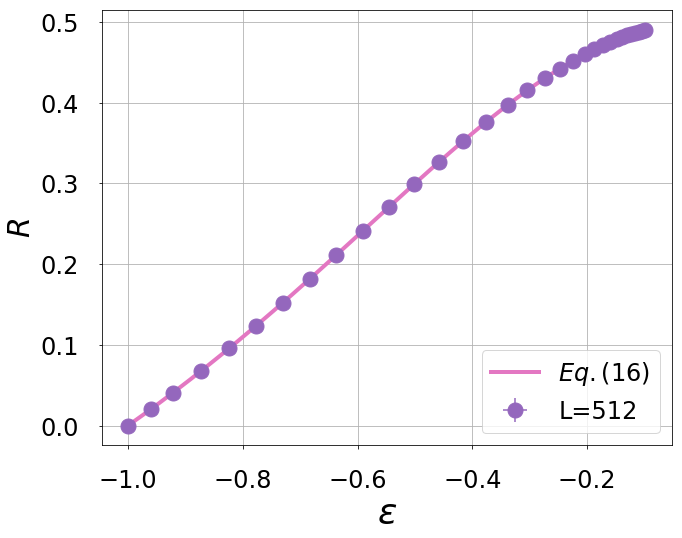

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

filename = 'heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
ax.errorbar(arr[:,1], arr[:,3], xerr=arr[:,5], yerr=arr[:,3]*(1-arr[:,3])/math.sqrt(1e7*L), fmt='o', label='L='+str(L), color=colours[L], ms=15)

e = np.linspace(-1, np.max(arr[:,1]), 200)
r_predicted = 0.5*(1 - e**2) / (1 + e**2)    
ax.plot(e, r_predicted, label=r'$Eq. (16)$', color=colours[0], linewidth=4)   

ax.legend(loc=4)    
ax.set_xlabel(r'$ \varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=30)
ax.grid(True)

fig.tight_layout()

fig.savefig(path_pics + 'I1HB-ER.png', dpi=300)
